<a href="https://colab.research.google.com/github/Owlmanandy/ATMS-421-Projects/blob/master/Sima_ESM_Module_4_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Earth Systems Modeling</h1>
<h2>Module 4: Box Models as a Scalable Formalism<br>
    Lab 4: The Continuity Equation &amp; Box Models of Population [25 pts]</h2>
<blockquote>Many men go fishing all of their lives without knowing that it is not fish they are after. - Henry David Thoreau</blockquote>

<h3>Part 1: Introduction to Box Modeling</h3>
<p>Box modeling is an extensible formalism applicable to any extensive quantity (i.e., mass, energy electric charge, etc. all work, but heat capacity and temperature do not). A single box may be crafted to represent the time evolution of any extensive quantity within a homogeneous space. Two such boxes may represent exchanges of the quantity between two homogeneous spaces, while N boxes may be shrunken and distributed across spatial dimensions to create a higher resolution representation. Let's take a closer look at how this works.  </p>


In [0]:
# Figure 1. Extensible legos as a proxy for box modeling, 1 lego -> 2 legos -> N legos.
from IPython.display import IFrame    
IFrame('https://giphy.com/embed/11UWYudfYexnxe', width=240, height=150) 

<p>Modelers have many options regarding the mathematical representation of their system and the numerical tools at their disposal. If we restrict ourselves to the finite difference method, we can keep track of everything in a single box, link a few boxes, or we can render the system in finer spatial detail with multiple boxes as shown in Figure 2 below. If our model is dynamic, we may then quantify the flows of material or energy in and out of a single box, or we could link several boxes and keep track the flows exchanged between each box.</p>
<p>As we break down our problem into multiple boxes, we simultaneously break down the mathematical integrals into approximate matrix forms as illustrated in Figure 3, which is an example of a nonlinear differential equation. </p>

<h4>Question 1.1: What are integral forms and why would they be expressed in terms of matrices?</h4>
<p>Can you identify the nonlinear term in the integral or matrix forms in the figure below? Why do computational scientists perform integrations? Why reinterpret the equations into a matrix form?</p>

<table>
<tr><td><img src="https://drive.google.com/uc?export=view&id=1uyCtI7C6GgKXue8Ek1KMD9pLL2w4JZ6v" alt="Drawing" width = "400px;"/></td><td>
<img src="https://drive.google.com/uc?export=view&id=1TfdyQ9nYbYVizBzyQH2-fcbq-drfiLgs" alt="Drawing" width = "320px;"/></td></tr><tr><td style="text-align:left">Figure 2. A 10 to 100 nanometer protein is broken into <br>individual atoms and discretized onto a grid. Charge, Q, is redistributed through trilinear interpolation.</td><td style="text-align:left">Figure 3. A discretized finite difference approximation of the <br>Poissson-Boltzmann equation used as a classical, electrostatic <br>representation of the charge distribution for a given protein (5 to 100 nanometers in size). <br>The integral form is broken into matrix form amenable to the application of quasi-Newton multigrid solver.</td></tr></table>


YOUR ANSWER: I have no idea what this question is asking but I think that the nonlinear term in the matrices given is the h^2 term in the Au box.  Howevever, there's also a h^3 term and a sin(h) term in the N(u) box, so I'm not sure if there is more than one nonlinear term or I'm just not answering the question correclty.  Scientists use integrations so that we can look at information in a linear format, which, if I remember correctly, is easier for computers to handle.  Exponential models are continuous values and computers handle discrete values best, so performing integrations allows scientists to linearize the model and make it into a discrete value.  I have no idea what the equtions in a matrix form are but I'm guessing it has something to do with the parts of an integral and how integratio of multiple terms works.

<h3>Part 2. The Continuity Equation</h3>
<p>If we focus on just one box, we are primarily concerned with what enters and leaves our box and the processes occuring within the box. Figure 4 shows a single box model for the chemical dispersion of atmospheric species X. </p><div><img src="https://drive.google.com/uc?export=view&id=1r9_kC5iNxMs_1ixId5NifIVsuytby6-n" alt="Drawing" style="width:500px;"/>Figure 4. A figure illustrating the flows of chemical species X into and out of a box, and the processes within the box that contribute to or eliminate species X. Figure taken from Atmospheric Chemistry by Daniel Jacob (1999) p 23.</div>
<p>In Figure 4 we notice the inflow and outflow of air denoted as $F_{in}$ and $F_{out}$. Within the box, species X may be emitted $E$, produced by chemistry in the atmosphere $P$, deposited on the surface $D$, or lost due to additional chemistry $L$. Keeping track of the amount of species X within the box is then just a simple matter of book keeping. We only need to add the gains (sources) and subtract the losses (sinks). If these processes enumerated are expressed as rates then our equation appears as follows:</p>

\begin{equation}
\frac{dX}{dt} = \sum{Sources} - \sum{Sinks} = F_{in} + P + E - (F_{out} + L + D)
\end{equation}

<p>The above is an expression of something called the continuity equation. The continity equation may be used for any extensive quantity, but it is especially useful when applied to conserved quantities. In fact, continuity equations are often considered as strong, local forms of conservation laws. What does this mean? It means that computationally over a finite domain you can require strict adherence to any conservation law applicable to your problem and model type. </p>

<p>Typically continuity equations are expressed as rates. Let's rework the above equation to make the rates stand out.</p>

\begin{equation}
\frac{dX}{dt} = \sum{Sources} - \sum{Sinks} = \frac{m_X}{y} \cdot \frac{dy}{dt} + \frac{dX_P}{dt} + \frac{dX_E}{dt} - (\frac{m_X}{y} \cdot \frac{dy}{dt} + \frac{dX_L}{dt} + \frac{dX_D}{dt})
\end{equation}

<p>In the above expression, $\frac{dX}{dt}$ represents the change in box-bounded mass of species X, $dX$ over an infinitesimal period of time, $dt$. Box models are most often expressed in differential form due to their compatibility with numerical solvers.</p>

<p>Interesting historical fact for the day: the Law of Conservation of Mass was formulated based on Antoine Lavoisier's 1789 discovery that mass is neither created nor destroyed in chemical reactions. You can learn more about the conservation of mass, the continuity equation, and various applications at these sites (as you have time or interest): </p>

<a href="https://www.nature.com/scitable/knowledge/library/the-conservation-of-mass-17395478/">https://www.nature.com/scitable/knowledge/library/the-conservation-of-mass-17395478/</a><br>
<a href="http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap5.html#pgfId=109228">http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap5.html#pgfId=109228</a><br>
<a href="https://www.continuummechanics.org/continuityequation.html">https://www.continuummechanics.org/continuityequation.html</a><br>
<a href="https://en.wikipedia.org/wiki/Continuity_equation">https://en.wikipedia.org/wiki/Continuity_equation</a>

<h4>Question 2.1: Make a conceptual 1-Box model for the population of coho salmon in Lake Michigan.</h4>
<p>In answering this question pretend that you were approached by the Michigan, Illinois, and Wisconsin Departments of Natural Resources, and they want you to make a determination of how much coho salmon to stock in Lake Michigan this year to sustainably support the commercial and recreational salmon fishing demands under the threat of a disease that could kill anywhere from 10% to 50% of the total salmon population.</p>
<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Oncorhynchus_keta.jpeg" width="200">
<p>Work within your group to work out a conceptual model of the processes that you believe alter the population of fish within the Lake. Remember to use the 1-box formalism in this case. If you cannot recall the steps we discussed in class, they are listed below for your reference. Please try to provide an answer for each step.</p> 
<ol>
  <li>Create a Conceptual Model</li>
  <ol type="a"><li>Identify the systems/hypotheses/problems you wish to investigate. </li>
    <li>Start with a verbal description of what is known about your system/hypothesis/problem. Consult the literature and to better delineate assumptions from fact. What is known, what are you assuming, and what remains an open question?</li>
    <li>As you create your conceptual diagram, you will need to consider a few organizing principles: <ul> <li>Modeling Perspective: Are you modeling the behavior of entities or the operations of a system comprised by components? Are you tracking the independent decisions, relationships, or trajectories of entities (e.g., agents, particles, photons, planets, etc.), or is your subject better represented with an average statistical description sufficient (e.g., ensembles of particles, a known distribution of an entity, etc.), or does it makes sense to model conserved quantities (e.g., mass, energy, momentum, nominal money, etc.)? 
      </li><li>Time Dependence: Will you require a static, steady-state, or dynamic model to answer your question or solve your problem? Are you forecasting (hindcasting) the future (past), are you figuring out how a stable (equilibrated) system works, or are you attempting to identify structural weak points or bottlenecks in a design? How will you model time? (What is the timing of a decision?)</li>
      <li>Spatial Scale: What spatial scale makes sense for your problem? By going to big, you may lose vital resolution. By going too small you might miss critical large-scale features, or exhaust computational resources expending several months of wall time to produce an interesting answer. (Spatial scales are often limited by time dependence. What is a time-step? What does the time-step mean in terms of space?)   
      </li></ul> 
    </li>
    <li>Create a graphical block diagram representing known entities or components with blocks and relationships. Connect these boxes with arrows representing a sequential flow, relationships, or material exchanges. When modeling an Earth system it is useful to identify a common "currency" of exchange between entities. For instance, an energy balance based climate model might attempt to reconstruct energy flows in terms of energy flux (Watts per meter-squared), while a global carbon cycle model might examine the flow of elemental carbon as TgC/yr. </li>
</ol></ol><br>


YOUR GROUP'S ANSWER:
We want to investigate the population of Coho Salmon in Lake Michigan and how that population changes in relation to various factors.  We want to be able to estimate the number of salmon in the lake over given time, in conjunction with the factors that affect this and how this number changes.  The goal is to find the population of salmon in the lake in relation to various factors of the lake including inputs, outputs, and standard parameters. Change over time is the key here. (time-step should be smaller than the time you want to simulate; time-step of days is good to simulate years)

We decided that our model would follow the population of Coho salmon in the lake over time, with the spatial scale being the entirety of Lake Michigan (but not its tributaries) and the time scale being years.  Our important factors are stocking, migration, death, and carrying capacity.  We had a graphic diagram with one block in the middle, labeled Lake Michigan, with one arrow going in (stocking) and two arrows going out (death and migration).

I ended up skipping a lot of the beginning of the lab in-class so that I could follow along with class discussion.  Discussion didn't skip parts of the lab, really, we just kind of glazed over the less vital parts and instead focused more on the model.  So for things like discrete values, we talked about it, but I didn't have a chance to fill in the lab information.  So a lot of my answers may end up being very brief synopses of information we discussed in class, without the code.  Because, for the most part, I didn't have time in class or out of class to write the coded answers to the questions.

<h4>Question 2.2: In YOUR own words, formulate a definition for the continuity equation.</h4>
<p>There are a few links above for your reference. (The Wikipedia article is okay.) How does your definition of the continuity equation link up with your simple model of the coho salmon in Lake Michigan? What are a few other applications of the continuity equation? In your opinion, what makes a continuity equation based approach to modeling so useful?</p><br>
YOUR ANSWER

A continuity equation is something that defines a continuous value, I think.  Or something like that.  So it lets us model systems that don't have naturally-occuring blocks of time and are instead continuous flowing systems.  Most, if not everything, on earth is a continuous system, so using continuity equations allows us to get closest to the natural movement of things as opposed to the discrete steps of algebra and regular math.  We can use continuity equations to model population, the motion of celestial bodies, air flow, river sediment movement rates, and more.  The fact that continuity equations more closely mirror real life is what makes them useful.

<h3>Part 3: Discrete Versus Continuous Variables in Numerical Modeling</h3>

<p>Our next objective is to convert our conceptual model into a numerical representation. Do you recall the steps from Module 1? Let's revisit them ... </p>
<ol start="2">
<li>Formalize Your Model with Math</li>
  <ol type="a"><li>Start with "back of the envelope" estimates as an rough outline for your model with defined limits.</li>
    <li>Identify possible variables, parameters, and units for your model. You might not use all of the variables and parameters, or might consider more later. Models are always a work in progress.</li>
    <li>Identify the modeling framework. Will you apply differential equations, machine learning, graph theory, and/or statistics? What approach makes the most sense for your model?</li>
    <li>Incorporate the known physical principles. Are there any known equations that are critical to your model? Add these as a starting point.</li>
    <li>Peform a preliminary analysis of your model. Have you added complexity to your initial calculation? Do you have estimates for parameters? Is anything missing or grossly misrepresented?</li>
  </ol></ol>
<p>Starting with Step 1 (A in the list above), you'll need to roughly define the limits of your model. The key here is not to get too hung up on your model being perfect. So, let's say we'll have somewhere between $10^6$ and $10^9$ coho salmon in Lake Michigan? Is this reasonable? Why or why not? Let's also say that Lake Michigan can support 5 x $10^9$ coho salmon total. We might even look up the size or other characteristics of Lake Michigan to start to frame our model in this step.</p>
<p>Steps 2. and 3. are somewhat intermingled in the sense that your notions regarding units and parameters might dictate your modeling approach. Why? Let's say that I want to use the natural number set ($\mathbb{N}$) for describing fish, or $\{X\ \epsilon \ \mathbb{N}\ |\ X\ <=\ 5\ x\ 10^9\}$. (This is set notation, and it means that I will represent my fish, X, as an integer between zero up to my predefined limit of 5 billion fish. There can be no partial fish; only completely intact fish are permitted to exist.) While this approach seems like a no-brainer, once I make this determination I limit the modeling tools I can use. If I elect to use $\mathbb{N}$ to represent fish, then we'll need to use <a href="http://discrete.openmathbooks.org/dmoi2/sec_intro-intro.html">discrete mathematics</a>, a toolset most undergraduates have not seen. Discrete approaches could include <a href="https://en.wikipedia.org/wiki/Agent-based_model">agent modeling</a>, a method for simulating the many possible outcomes of fishy mating decisions, or <a href="https://en.wikipedia.org/wiki/Monte_Carlo_method"> a Monte Carlo based approach</a> where you sort of predetermine the probability distribution but also run through many scenarios.</p>
<p>
Some potentilally interesting resources regarding discrete modeling options:<br>
<a href="https://stats.stackexchange.com/questions/206149/monte-carlo-simulation-using-exponential-distributions">A Monte Carlo approach to what we are doing in class</a><br>
<a href="https://link.springer.com/article/10.1007/BF02510937">A stochastic computer model for simulating population growth, Sonleitner, 1977</a><br>
<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6598210/">Modeling cell population dynamics, Charlebois and Balazsi, 2019</a><br>
<a href="https://link.springer.com/chapter/10.1007/978-3-319-32283-4_9">How to Describe Agent-Based Models in Population Studies, Groeneveld et al., 2016</a><br>
<a href="https://www.frontiersin.org/articles/10.3389/fevo.2018.00237/full">Decision-Making in Agent-Based Modeling: A Current Review and Future Prospectus, DeAngelis and Diaz, 2019</a><br>
</p>
<p>The above approaches are less appealing to studying non-population Earth system proceseses for two reasons. First, if I want to study ice sheets, water is discrete at an incredibly small size scale while ice sheets are expansive by comparison. It just makes sense to model ice as a continuous quantity and not bother with the resolution of individual water molecules. Second, if I spend time and computational resources on modeling individual molecules, even with todays computers and quantum computing on the horizon, I would be lucky to get past a few days. We can forget about simulating the 2.56 millions of years of the Pleisotcene record. So, this is why the physcial scale, time-limits, and numerical representation (discrete or continuous variable) are all critical things to consider at the outset of building a model.</p>
<p>Since we want to keep building upon our Earth systems modeling toolkit throughout the semester, I am going to restrict you to treating fish as continuous variables. In set notation, this means we will use the $\{X\ \epsilon \ \mathbb{R}\ |\ 0\ <\ X\ <=\ 5\ x\ 10^9\}$. When using continuous variables, we can have negative fish. Negative fish aren't physical, perhaps in an alternate universe there are anti-matter fish, but they still wouldn't be represented with negative numbers.</p>
<p>Now we are making some real progress toward actually running a model! We will treat fish as a continuous variable, but how does this variable change with respect to time? As humans, we are pretty good thinking about change on a day-to-day or year-to-year basis. Through our observations of fish and other species, we know that the fish population of next year is dependent upon the fish population of today and other circumstances. As we follow these lines of reasoning we are moving on to Step 4. Changes in a quantity from day-to-day are formally called rates. If we consider rates, we'll need integration tools to make predictions. If we recognize that the time-dependent change in fish population has an exponential tendency, we have started to identify the physical principles governing our Earth systems process.</p>

<h4>Question 3.1: Briefly describe the advantages and disadvantages of representing fish as a continuous variable.</h4>

YOUR ANSWER

The biggest advantage, it seems to me, is that fish are naturally continuous; although there are a discrete number of individual fish, the population as a whole is easily treated as a lump sum that is continuously changing.  We can look at it as a single mass instead of being made up of individual parts, but we still get useful info when dealing with those individual parts in the real world.  The disadvantage, of course, is that computers don't really work with continuous variables very well, so we have to get around that with math and coding and calculus and for loops and things like that.

<h4>Question 3.2: What are the limitations of using an exponential model to represent coho salmon in Lake Michigan?</h4>

YOUR ANSWER

It depends on the complexity of the model used.  Generally, an exponential model will be very simply and won't take into account other factors beyond the growth rate and carrying capacity.  A more complicated model, however, using more than just exponential functions, could simulate a more nuanced change in fish population.  I'm not entirely sure if the exponential model is just referring to the simple kind of verhulstian models we made in class, or if it's referring to exponential growth as a whole instead of, say, using a model based on sums, sin curves, logarhythms, and the like.  Sin curves might be interesting to model the change in late-stage populations, when they're at the carrying capacity, but it might also lack the nuance to accurately predict changes.  More complication would have to be built in.


<h3>Part 4. Malthusian and Verhulstian Population Models</h3>
<p>Thomas Robert Malthus was a demographer and economist who wrote concerning his observations on human population in the 1978 book, <i>Essay on the Principle of Population</i>. Malthus observed that in times of prosperity, people tended to have more children rather. When difficult times inevitably returned, the higher population was thus even more suceptible to famine and disease. Therefore human population was at the mercy of feast and famine cycles. While his observations may have led him to pursue poor economic policy, they remain salient to the mathematics used to describe population for innumerable species. </p> 
<p>Perhaps you've heard of r-selected and K-selected species? This convention follows from the work of Pierre François Verhulst, who translated observations from his own research based on this Malthusian idea into a mathematical model. In a series of three papers written between 1838 and 1847, Verhulst introduced his logistic equation for population growth. While the presentation of the equation was changed in the early 1900s, Verhulst's equation still shows up in ecology and biology courses as well as the current <a href="https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/ecs2.1895">scientific literature</a>. It encodes an undeniable truth about our world: biological organisms have an imperative to reproduce but are limited by competition for finite resources. Let's take a look at the eq. 1 and remind ourselves about r-selected and K-selected species. Eq. 1 states that on average, a population will change with respect to time according to an exponential trend. This exponential trend is governed by the rate constant, r, (also called the Malthusian parameter), and growth will be diminished as the population gets closer to a carrying capacity, K.</p>

Equation (1):
$$X(t) = \frac{K}{1 + ( \frac{K-X_0}{X_0})e^{-rt} }$$


<h4>Question 4.1: Plot the Verhulst equation for population.</h4>
<p>Write a python function representing eq. 1, and use NumPy linspace or arange to create an array of times (units of your choosing) to plot. Make a plot for a few different carrying capacities and rate constants. Remember that your initial population cannot be zero.</p>

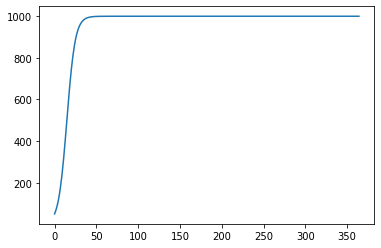

In [0]:
#I'm not really sure what I'm supposed to be doing here, or how it would be different than the verhulst equation that we already programmed (or, rather programmed in part 6 but at an earlier date than I'm doing this now)
#So, anyway, here's my best guess, given my limited time, to plot the analytical solution.  I think the blue line is just the date.  But I'm not sure.
import matplotlib.pyplot as plt
import numpy as np

# r = 0.1 #per day
# K = 2000
# x0 = 100
# param = [r,K,x0]

# def analytical(param,t):
#   pop = np.zeros([t,2]) 
#   pop[0,0] = 0
#   pop[0,1] = x0
#   for i in range(t-1):
#     pop[i+1,1] = K/(1+((K-x0)/x0)*np.exp(-r*t))
#     pop[i+1,0] = pop[i,0] + i
#   return pop

# plt.plot(analytical(param,1000))

def analytical_sol(t,param):
  r = param[0]
  K = param[1]
  x0 = param[2]
  return K/(1+((K-x0)/x0)*np.exp(-r*t))

param = [0.2,1000,50]
time = np.arange(365)
fish = analytical_sol(time,param)

plt.plot(time, fish)

<h4>Question 4.2: What is the difference between r-selected and K-selected species?</h4>

YOUR ANSWER

r-selected species are species characterized by high growth rates and exponential growth, or growth nearing exponentiallity.  Things like rabbits, bacteria, and the like.  They produce many offspring with low individual chances of survival.  K-selected species are the opposite; low growth rates, with few offspring produced, but the offspring have a higher chance of survival.  Species like pandas, owls, people.

<h3>Part 5. Applying a Finite Difference Approximation to the Verhulst Equation</h3>
<p>Now we have a 1-box model for the coho salmon population of Lake Michigan and we have an equation representing population. Although we have an analytical solution to our rate equation, we want to work an approach to solve it numerically so that we can add some complexity to our model. If we took the time derivative of X above, after a bit of algebra and rearrangment, we would end up with the rate presented in its integral form  as eq. 2.</p>

Equation (2):
$$\int \frac{dX}{dt} = \int r X (1 - X/K)$$ 

<p>If we recognize that we can compute a definite integral by figuring out the area underneath our rate curve, and that we can estimate the area under the curve using rectangular areas we are well on our way to the finite difference method. In fact, you may remember from calculus that definite integral may be solved with Riemann sums. However, we want to know how the population changes over time and not just the total number of fish at the end of the year. The numerical approach is similar to Riemann sums and was first presented by Leonhard Euler in 1768 almost 80 years before Riemann sums were described. Euler recognized that you could inflate the infintesimals such that $dX \rightarrow\ (X(t_1)\ -\ X(t_0))\ =\ \Delta X$ and $dt \rightarrow\ (t_1\ -\ t_0)\ =\ \Delta t$, as shown in eq. 3.</p>

Equation (3):
$$\frac{\Delta X}{\Delta t} = r X \big(1 - \frac{X}{K}\big)$$

<p>Which can be rewritten as eq. 4 below, where $\Delta t$ represents a time-step. Note that this is called the forward or explicit Euler approximation.</p>
Equation (4):
$$\frac{X(t_1)\ -\ X(t_0)}{\Delta t} = r X(t_0) \big(1 - \frac{X(t_0)}{K}\big)$$

<p>If we solve eq. 3 for X(t_1), we will have made our first fintite difference approximation of the ordinary differential equation called the Verhulst model. Our first modeling objective will be to build a logistic population model using the finite difference method, which we will then apply to a more complex function in the second exercise.  Technically we can solve the Verhulst model without a finite difference method; however, we will require this method will be required for Part 7? of the Module 4 Lab.</p> 

<p>As stated previously, it is a good practice to develop numerical tools based on an equation that can be solved analytically or for a known case. Once we write out the numerical model, we can test it against the analytical equation to <strong>verify</strong> that our model works. Above, we broke down our equation of interest into time dependent pieces. Now we need to track this pieces over a time progression. To start, we need solve eq. 4 for $X(t_1)$. This is the future value of population that we so desperately want to track over time.</p>

<h4>Question 5.1: Solve equation for $X(t_1)$.</h4>
<p>Use LaTex to present your equation. This is the equation we will need to covert into code later.</p>


This was already here when I got here, and I think it's what the question is looking for.
$$YOUR \ ANSWER$$

$X(t_1) = X(t_0) + (r*X(t_0)*(1-X(t_0)/K))*dt$

<h3>Part 6: Getting Loopy with NumPy.</h3> 
<p>To write the code for our finite difference approximation, we need to learn a bit about for loops in Python and ndarrays in NumPy. In NumPy, We can generate an array of zeros or ones with the following commands.
<pre>
X0 = np.zeros([100,1])
X1 = np.ones([100,1])
</pre>
<p>While this may not seem particularly helpful yet, this is a good way to go in a simulation. You are pre-allocating memory for your array in a step called initialization. This step forces you to deeply consider how your model works, since you'll need to anticipate how large your array will be when you finish computing your model. (i.e., How how many time-steps will you take?) The above arrays are 100-rows by 1-column. Essentially this means that your don't need the second dimension. NumPy has a special function to take away unnecessary dimensions: <code>np.squeeze(X0)</code>. Another really useful command that you'll want to employ when working with NumPy arrays is <code style="display:inline;">np.shape(X0)</code>. This function will provide you with a tuple holding the dimensions of your array.</p>
<h4>Question 6.1: Can you write code for these commands in the coding cell below?</h4>
<ol>
<li>Using the appropriate command in NumPy, initialize an array ones with dimensions [50, 30, 1].</li>
<li>Print the shape of the array you just made.</li>
<li>Squeeze the array to eliminate unnecessary dimensions. (You might want to store the squeezed array as another array.)</li>
<li>Print the shape of the array once again.</li>
</ol>

In [0]:
# Place your code here:
import numpy as np

array1 = np.ones([50,30,1])
np.shape(array1)
array2 = np.squeeze(array1)
np.shape(array2)
print(array2)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


<p>We have used ndarrays before. The name represents N-dimensional array, and N-dimensional arrays are an indispensible tool in finite difference models. Another really useful command to add to your debugging toolkit is np.dtype(). This allows you to type your ndarrays.</p>
<p>Our next step is to get loopy with ndarrays! If you are new to coding, we have seen for loops in our notebook tours and used them to compute the mean of our step-size measurements in the Module 1 Lab. We looped over a Python list in that exercise, and I provided code that looped over an <a href="https://docs.python.org/3/library/functions.html#enumerate">enumerate object</a> This is an iterable sequence type supported by Python. The range() built-in function produces a similar construct: it is an iterable, but immutable sequence type commonly used if for loops. <a href="https://docs.python.org/3/library/stdtypes.html#typesseq-range">You can read more about the range constructor here</a>. Let's take a look at some code that uses the Python built-in range().</p>
<pre>
import numpy as np
X = np.zeros([100,1])
for i in range(100):
    X[i] = i
print(X)
</pre>

In [0]:
# Place the example code here and test it.
#yes this will value each part of the array as its numerical value order thing right yes I get this
#range is non-inclusive, if I want 100 to the last value I have to make the range 101.  But making the range 100 gives 100 values because 0 is the first value
import numpy as np
X = np.zeros([100,1])
for i in range(100):
    X[i] = i
print(X)

The loop above works through 100 steps.  The letter $i$ is called the indexing variable. It can be named anything you like, but i,j,k are customary names for the indexing variable (due to summation conventions and <a href="https://en.wikipedia.org/wiki/Einstein_notation">Einstein notation</a>). When using the range() object sequence in Python, you use the variable i to reference a position within the ndarray and to generate numbers as we did in the above example. Let's use another loop to generate the Fibonacci sequence.  To do this, we need to identify our first two terms, $FS(1,1) = 0$ and $FS(2,1) = 1$.
<pre>
import numpy as np
n = 100
FS = np.zeros([n,1])
FS[0,0] = int(0)
FS[1,0] = int(1)
for i in range(n-2):
    FS[i + 2] = int(FS[i]) + int(FS[i +1]);
    print('%8d \n' % FS[i])
</pre>

<h4>Question 6.2: Can you write write the code for our finite difference approximation of the Verhulst equation above?</h4>
<p>Rewrite eq. 2 in terms of our indexing variable $i$, and place this equation within a loop counting from 1 to variable n+1. You may define this as a function if you wish.</p>

In [0]:
# Try out the Fibonacci sequence ...
import numpy as np
n = 100
FS = np.zeros([n,1])
FS[0,0] = int(0)
FS[1,0] = int(1)
for i in range(n-2):
    FS[i + 2] = int(FS[i]) + int(FS[i +1]);
    print('%8d \n' % FS[i])

Text(0, 0.5, 'Number of fish')

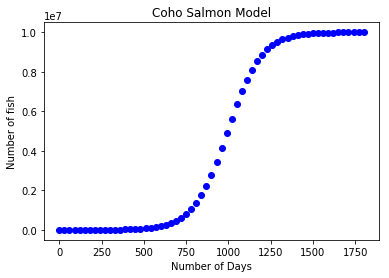

In [0]:
# Write the code for your finite difference solution here ... #in class 
#for loop into the function

import matplotlib.pyplot as plt
import numpy as np

r = 0.01 #per day
K = 10000000
x0 = 500

param = [r,K,x0]

def verhulst(param,sim_time,timestep):
  import numpy as np
  '''
  inputs: parameters, which should be loosely defined to automate making scenarios
  sim_time: the length you want to run the simulation for
  timestep: time between each calculation
  returns: an array of times and populations (gives the population over a given time)
  '''
  r = param[0] #linearized slope of the exponential function, roughly the growth rate
  K = param[1] #carrying capacity in terms of individuals
  x0 = param[2] #initial population
  
  n = int(np.ceil(sim_time/timestep)) #this allows the simulation time to be a little bit more so as have a solid integer. n is the number of steps.  CAN USE np.dtype() as a debugging tool, figure out float, int, etc. 
  pop = np.zeros([n,2]) #n is number of steps. this INITIALIZES the array. Can also use np.empty, np.zeros, np.ones USE BREAK to put some end into loops.  Break the loop if the population hits zero, for example.
  pop[0,0] = 0 #this is the time column?  IMAGINE A MATRIX with two columns and infinite rows. in [x,y], x is the row location (being 0 to n for time step) and y is the column number (being 0 and 1 for two columns) [row, column]
  pop[0,1] = x0  #this is labelling the first value in the second column as x0.
  
  for i in range(n-1):
    pop[i+1,1] = r*pop[i,1]*(1 - pop[i,1]/K)*timestep + pop[i,1]  #THIS IS THE ACTUAL EQUATION, where the next value equals the previous values added together.
    pop[i+1,0] = pop[i,0] + timestep
  
  return pop

array = verhulst(param,1825,1)

def analytical(param,t):
  return K/(1+((K-x0)/x0)*np.exp(-r*t))

solution = analytical(param,1)

plt.plot(array[:,0][::30],array[:,1][::30],'bo') #this defines independent, dependent variables, defines column 0 as x, column 1 as y
#plt.plot(array[:,0],solution,'r')
plt.title('Coho Salmon Model')
plt.xlabel('Number of Days')
plt.ylabel('Number of fish')
#NEED TO PLOT ANALYTICAL SOLUTION, TOO! SEE 4.1 equation 1

<h4>Question 6.3: Can you run the code for the finite difference approximation of the Verhulst equation and make a plot?</h4> 
<p>Using the ideas above write a for loop to iterate over your Mathusian model using an initial population of 100 individuals, a carrying capacity, $K$, of 2000 individuals and a birth rate constant, r, selected to produce 10 individuals per 100 individuals. $(100*r = 10)$ </p>
<p>**Note** that your timestep could easily be one day, one year, or one millennia. This is up to you. Be sure to state your time unit in the cell below.</p>

<p>Since we will want to change the values for birth rate constant, initial population, and simulation length, it is best to create a function containing your code for the model. We'll use this function in Part 7.</p>

<p>Once you have your function working, you can attempt to do the following as you have time:</p>
<ol>
<li>Make a plot of one simulation against the analytical solution. How do these compare? (We will examine the difference between the analytical solution and numerical approximation more closely in Module 5.)</li>
<li>Figure out what day you reach 2000 individuals with the np.where() function.</li>
<li>Test three different conditions (birth rate, carrying capacity, or initial condition), and "Play" with your model.</li>
<li>Plot the solutions for a variety of different conditions (alter your model parameters).</li></ol>

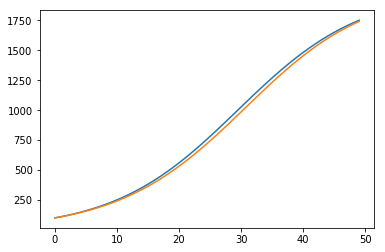

In [0]:
#Okay when I first looked at this section I thought we were just graphing a bunch of different versions of the verhulst equation so that's what I did, and that's down below.
#then I was told we were supposed to graphing the analytical solution versus our model and I thought I got that working but I don't know what's happening in this box and why the verhulst model here looks
#so different than the models in the rest of my boxes, and I'm not really sure what to do to fix it.  But I mean overall I ended up getting something to work here so I guess it's okay?  I didn't have much time to troubleshoot it.

import matplotlib.pyplot as plt
import numpy as np

def analytical_sol(t,param):
  r = param[0]
  K = param[1]
  x0 = param[2]
  return K/(1+((K-x0)/x0)*np.exp(-r*t))

param = [0.1,2000,100]
time = np.arange(50)
fish_sol = analytical_sol(time,param)

def verhulst(param,sim_time,timestep):
  
  r = param[0] 
  K = param[1]
  x0 = param[2] 
  
  n = int(np.ceil(sim_time/timestep)) 
  pop = np.zeros([n,2]) 
  pop[0,0] = 0 
  pop[0,1] = x0  
  
  for i in range(n-1):
    pop[i+1,1] = r*pop[i,1]*(1 - pop[i,1]/K)*timestep + pop[i,1]  
    pop[i+1,0] = pop[i,0] + timestep
  
  return pop

fish_model = verhulst(param,50,1)
plt.plot(time, fish_sol)
plt.plot(fish_model[:,0], fish_model[:,1])

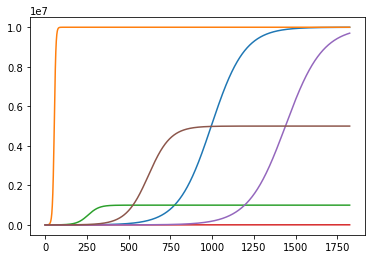

IndexError: ignored

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def verhulst(param,sim_time,timestep): #growth rate, carrying capacity, intial pop, number of steps, time step
  import numpy as np
  '''
  inputs: parameters, which should be loosely defined to automate making scenarios
  sim_time: the length you want to run the simulation for
  timestep: time between each calculation
  returns: an array of times and populations (gives the population over a given time)
  '''
  r = param[0] #linearized slope of the exponential function, roughly the growth rate
  K = param[1] #carrying capacity in terms of individuals
  x0 = param[2] #initial population
  
  n = int(np.ceil(sim_time/timestep)) #this allows the simulation time to be a little bit more so as have a solid integer. n is the number of steps.  CAN USE np.dtype() as a debugging tool, figure out float, int, etc. 
  pop = np.zeros([n,2]) #n is number of steps. this INITIALIZES the array. Can also use np.empty, np.zeros, np.ones USE BREAK to put some end into loops.  Break the loop if the population hits zero, for example.
  pop[0,0] = 0 #this is the time column?  IMAGINE A MATRIX with two columns and infinite rows. in [x,y], x is the row location (being 0 to n for time step) and y is the column number (being 0 and 1 for two columns) [row, column]
  pop[0,1] = x0  #this is labelling the first value in the second column as x0.
  
  for i in range(n-1):
    pop[i+1,1] = r*pop[i,1]*(1 - pop[i,1]/K)*timestep + pop[i,1]  #THIS IS THE ACTUAL EQUATION, where the next value equals the previous values added together.
    pop[i+1,0] = pop[i,0] + timestep
  
  return pop

param1 = [0.01,10000000,500]
param2 = [0.2,10000000,500]
param3 = [0.03,1000000,500]
param4 = [0.001,100000,1000]
param5 = [0.009,10000000,25]
param6 = [0.015,5000000,500]

Model_1 = verhulst(param1,1825,1)
Model_2 = verhulst(param2,1825,1)
Model_3 = verhulst(param3,1825,1)
Model_4 = verhulst(param4,1825,1)
Model_5 = verhulst(param5,1825,1)
Model_6 = verhulst(param6,1825,1)

plt.plot(Model_1[:,0],Model_1[:,1])
plt.plot(Model_2[:,0],Model_2[:,1])
plt.plot(Model_3[:,0],Model_3[:,1])
plt.plot(Model_4[:,0],Model_4[:,1])
plt.plot(Model_5[:,0],Model_5[:,1])
plt.plot(Model_6[:,0],Model_6[:,1])

# plt.show()
# idx = np.where(np.round(Model_1[:,1]) == 2000)  #What is this whole section doing?
# print(idx[0][0])
# print(Model_1[idx[0][0],1])

# for i in range(2,7):
#     var = 'Model_' + str(i)
#     temp = globals()[var]    # A way to call global variables from strings
#     plt.plot(temp[:,0],temp[:,1])
# plt.show()

<h3><strong>Part 7.</strong> A Simple Box Model Applied to Fish in Lake Michigan</h3><br/>
<p>In this final part of the Module 4 Lab, we will construct a simple 1-box model to represent the number of coho salmon in Lake Michigan, and monitor the fish levels over one spawning season from October to early December. (You may choose to run a longer simulation.)</p>
<p>With our newly constructed model, we will explore a variety of conditions to get a feel for how our model works. In the Module 5 lab we will extend our numerical approximation toolkit (use higher order numerical approximations) and perform a sensitivity analysis on this model. The sensitivity analysis will help us to better answer the question of how many fish to stock when faced with a probable epidemic.</p>
<h4>Question 7.1: Compare your initial 1-box model for the fish population of Lake Michigan <a href="https://drive.google.com/open?id=1hOJvwpWBEaO39nV_q6tocReWRHAq-2ZP">with this diagram.</a></h4>
<p>Coho salmon probably do not reproduce in Lake Michigan and they die after migrating to the Lake Michigan tributaries in their vain attempt to spawn. Update your conceptual model based on these observations, and in the cell provided below write out a coho salmon continuity equation based on this revised 1-box model.</p>

YOUR ANSWER HERE: This is our continuity equation that we can use for our model.  This was already here when I got here.  But the verhulst equation we used only included births and deaths; this is a more complex version of that.

THE rX[i] is more complex.

rX[i] = s + m[i]*X[i] + w*X[i]
$$\frac{dX}{dt} = \frac{dX_{stocking}}{dt} - \frac{dX_{migration}}{dt}  - \frac{dX_{disease}}{dt} - \frac{dX_{predation}}{dt} $$

<h4>Question 7.2: Estimate how many coho salmon are currently in Lake Michigan?</h4> <p>Approximately 2,473,881 coho were stocked in Lake Michigan in 2018. We know this number may have increased based on the article about the Michigan DNR plan for Lake Michigan.  What is the maximum number of Coho that can be in the lake after 3 years of stocking (assuming no births, and the maximal stocking rate)? Let's make this number our initial condition.</p>
<p>We will further assume, for simplicity, that stocking happens at an even pace year round (you can try other conditions). What is the estimated rate of fish stocking per day?</p>
<p>To progress with your model, need two numbers, 1. An estimate for the initial population of coho in Lake Michigan. 2. An estimate of the daily stocking rate of fish. The solution of any ODE is not guaranteed to be unique unless an initial condition is specified.</p>

In [0]:
# Initial Condition
1.4e6*3 - death #pretty much anything is justified here and we can adjust it accordingly.  
x0 = 2.4e6 #this is valid if I think tha they stock the same amount of fish that are in the lake every year.

# Stocking Rate per Unit Time
stock_rate = 2.4e6/365 #we can keep track of this in years, days, months, etc.  In this case it is in days, timesteps in days

#your determination of this rate dictates the units of time you are using.  Must be consistent!

<p>Next we can assume that approximately 1/3 of our population (X[i]/3) will be migrating to tributories over the months of October and November (and will die shortly after migrating).  Although a fairly complicated phenomena that depends on water temperature and other variables, we will simplfy this as a normal distribution of fish migrating between October and November with a peak near Halloween.  Here we require a numpy array representing the number of fish leaving the lake per day between October and November.
(n.b., if interested <a href="https://www.sciencedirect.com/bookseries/fish-physiology/vol/32/suppl/C">you can read more about Euryhaline fish here</a> and on <a href="https://www.sciencedirect.com/science/article/pii/S0003347217300295">salmon specificially here</a>)
</p>  
<p>There are a few ways to simulate a normal distribution of fish seasonally leaving. Here we are going to use a Monte Carlo-like approach and create an estimate of the probability distribution. Then we will multiply the population of migrating fish by the probability they will leave on a given day.</p>
<p>So how do we accomplish this? The next step is to write a function using the np.random.normal and the np.histogram() functions. If you use the density option, it will normalize the probability distribution to 1. You'll need 61 bins for 61 days (n.b., the number of bins is dependent upon your time units, so be consistent!) Also, depending on how normal you want your distribution to appear, you'll need to select an appropriate size in relation to the 61 bins. Your loc should be around the 31 day, and scale will depend on how spread out you want the migration.</p>
<h4>Question 7.3: Write your own migrating fish function using the np.random.normal and np.histogram() functions.</h4>
<p>Write a function with a name of your choosing that returns an array of probabilities that a mature fish will migrate over the migration season. This function will run prior to entering the migratory season of your program. You might want to test the output with the Matplotlib analog to visualize your efforts, or print out the ndarray. Remember that you never want more than 1/3 to 1/4 of the fish to leave in any given year.</p>

In [0]:
# Your function for migration probabilities
import matplotlib.pyplot as plt
import numpy as np

def migrator(n,szn_len): #n is the number of random samples you want, szn_len is the length of the spawning season in days
  import numpy as np
  fish_mig = np.random.normal(size=n) #the random number samples of how many fish leave each day in a 2-month period.  How many in each bin is what's important
  hist, bin_edges = np.histogram(fish_mig, bins=szn_len) #story the sample values as a histogram
  probability = hist/n
  return probability
  
#   prob_array = np.zeros([szn_len,2])  #THIS section is to make the probability numbers given into an array that I could maybe use for each day?  Or is that not necessary?
#   prob_array[0,0] = 0 
#   for i in range(szn_len-1):
#     prob_array[i+1,0]=i
#     prob_array[i+1,1]=probability  
#     return prob_array

print(migrator(1000,61))  #this represents the percentage of the migrating population that will leave each day over 61 days (the spawning season)
mig = migrator(1000,61) #an array of 61 probabilities for fish migration

migration_probs = np.zeros(365)
migration_probs[269:330] = mig

[0.001 0.    0.    0.    0.    0.001 0.001 0.    0.001 0.001 0.003 0.005
 0.005 0.003 0.005 0.008 0.009 0.012 0.023 0.021 0.023 0.029 0.022 0.04
 0.04  0.042 0.035 0.048 0.044 0.047 0.058 0.047 0.043 0.05  0.049 0.043
 0.027 0.036 0.028 0.025 0.024 0.019 0.022 0.009 0.008 0.008 0.006 0.012
 0.002 0.004 0.002 0.001 0.001 0.002 0.001 0.002 0.    0.001 0.    0.
 0.001]


<p>**Klios Morghulis.** While other species of salmon spawn within the tributaries of Lake Michigan, coho salmon do not. This simplifies our 1-box model a bit, but we still need to be wary of overstocking and we want our fish subject to a carrying capacity, K. Ultimately, we want to vary the fish death rates and test the impact on our population under the conditions of near constant stocking and seasonal migration. Just like the birth rate constant, death rate constant can also be viewed as a density dependent condition (particularly in terms of the spread of disease). Therefore, we need a mathematical expression to represent deaths due to disease and predation. Previously our birth rate constant was expressed as r. In reality, r represents a balance between births and deaths, and this rate is time-dependent. Let's break it into two components $\alpha$, new fish, and $\omega$, deaths, such that $r = \alpha + \omega$.</p>
Equation (5):
$$ \frac{dX}{dt} = (\alpha + \omega) X (1 - \frac{X}{K})$$
<p>We know that no fish are born in our model, however, the fish stocked and the fish migrating affect our total population. Therefore, we need to adapt Eq. 5 to our new scenario of stocking, migration, and deaths due to predation and disease. Before we get started, consider what the units of K are? Which parameters reflect that  lamprey, competition with alewife fish, and overfishing contributed to the extirpation of lake trout from Great Lakes in the 1960s. (<a href="https://www.axios.com/lake-trout-comeback-champlain-great-lakes-lamprey-6c49645d-4dd6-4453-b8d4-d24029c1c38a.html"> But they are back!</a>) We want to attempt to recreate a mass die off with our model, so we will need to try a variety of death scenarios (e.g., select a variety of $\omega_1$ and $\omega_2$ parameters).</p>
<h4>Question 7.4:  Define a range of death rate constant and carrying capacity parameters.</h4>
<p>Define your starting minimum death rate constant and justify it. Also specify a range of parameters you want to try for $\frac{\omega}{K}$ by trying to identify a reasonable carrying capacity for coho salmon. To do this, you'll need to consider your stocking rates and migration rates are per day.</p>

In [0]:
import numpy as np
omega = x0*0.0001          # A death rate constant of 0.01% per day, or 44% per year
k = x0*10                  # Carrying capacity in number of fish

# You should have a range here.

<h4>Question 7.5: Time to play with our first numerical model! </h4> 
<p>Now we are going to compute (loop) our model over 61 days via a simple iterative routine. You'll need to use loop imperative like the one outlined above to create the array X (see Part 6) in combination with eq. 7. 
Equation (7): 
$$\frac{\Delta X}{\Delta t} = (\frac{dX_{stocking}}{dt} - \frac{dX_{migration}}{dt} - \omega*X)*(1 - \frac{X}{K})$$ 
Rewriting eq. 7 in Python pseudocode and plugging in our Verhulst equation, we arrive at:<br>
$$X[i+1] = (dX_s[i]*\Delta t - dX_m[i]*\Delta t - \omega_1[i]*X[i]*\Delta t)(1 - \frac{X[i]}{K}) + X[i]$$
<ol>
<li>Your first step is to convert eq. 7 into a Python function.</li>  
<li>Use your guesses for $\omega_{1}$ and $\omega_{2}$ in an array like parameter, but don't worry too much about it.</li>
<li>Make sure your model runs and it is okay if it produces negative fish.</li>
</ol>
<p>As you work through this procedure, make sure to keep track of N[i+1] over each iteration so that you can track what your model is doing (plot it!). Don't be afraid to ask for help when working this out.</p>


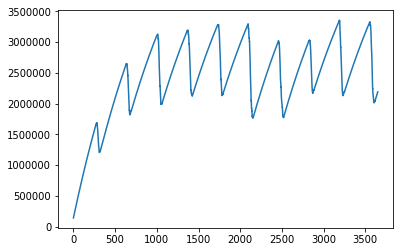

In [0]:
#IN CLASS ITERATION
import matplotlib.pyplot as plt
import numpy as np

def migrator(size, bins): #m: no. of fish migrating (1/3 to 1/4 of pop), bins: no. of days where migration happens
  from numpy.random import normal
  '''
  documentation: 
  input: size=no. of random number drawn, bins = days that fish migrate
  output: migration rate, no. of fish that migrate per day
  '''
  mig = normal(size = size, scale = 7, loc = 30)
  hist, bin_edges = np.histogram(mig, bins = bins, density = True)
  #plt.hist(mig, bins = bins)
  return hist


def fishy(param,sim_time,timestep):
  import numpy as np
  '''
  '''
  stock = param[0]
  death= param[1] #linearized slope of the exponential function, roughly the growth rate
  carry_cap = param[2] #carrying capacity in terms of individuals
  ini_cond = param[3] #initial population
  mig_frac = param[4] #fraction of population that migrates every year
  #could include parameteres for migration
  
  n = int(np.ceil(sim_time/timestep)) 
  pop = np.zeros([n,2])
  pop[0,0] = 0 
  pop[0,1] = ini_cond  
  
  #currently fish migration probabilities are calculated before the simulation.  Might want to include this in the integration loop (it's included now)
  #fish_mig = mig_frac*migrator(100,60) #probability
  
  for i in range(n-1):
    year = int(i*timestep/365) #this tells you what year you're on, using day timesteps
    days = int((i*timestep)%365)
    #new_year = int()
    #print(days, year)
    
    if days is 1:
      fish_mig = mig_frac*migrator(100,60) #this allows the migration rate to randomize each year
    
    if days >= 270 and days < 330:
      migrate = fish_mig[days - 270]
    else:
      migrate = 0
    
    pop[i+1,1] = (stock - (migrate + death)*pop[i,1])*(1 - pop[i,1]/carry_cap)*timestep + pop[i,1]  #THIS IS THE ACTUAL EQUATION, where the next value equals the previous values added together.
    pop[i+1,0] = pop[i,0] + timestep
    
    if pop[i,1]<0:
      pop[i,1]=0
  
  return pop
              
#param=[stock,death,carry_cap,ini_cond,mig_frac]
param = [(2.4e6/365),0.001,2.4e8,1.4e5,(1/3)]
plt.plot(fishy(param,365*10,.1)[:,0],fishy(param,365*10,.1)[:,1])

In [0]:
#The modulus % gives the REMAINDER
x = 500%365
print(x)

135


In [0]:
#MY SECOND ITERATION
import matplotlib.pyplot as plt
import numpy as np

#param = [s,mig_start,mig_end,w,K,x0]

def fishy(param,sim_time,timestep):

  s = param[0] #stocking rate, in fish per year.  for coho, around 2.4e6
  mig_start = param[1] #the start of the migration period in year date (269 for first day of october, roughly)
  mig_end = param[2] #the end of migration period in year number date (330 for last day of november, roughly)
  w = param[3] #death rate in percentage of population that dies
  K = param[4] #carrying capacity in terms of individuals, safe estimate is initial population times 10
  x0 = param[5] #initial population, about 2.4e6
  #sim_time is the length of time, in days, you want the simulation to run.  In this case, only 365 really works
  #timestep is the unit of time you want.  In this case it should be in days, or 1.
  
  szn_len = mig_end - mig_start
  
  def migrator(x): #n is the number of random samples you want, szn_len is the length of the spawning season in days
    fish_mig = np.random.normal(size=1000) #the random number samples of how many fish leave each day in a 2-month period.  How many in each bin is what's important
    hist, bin_edges = np.histogram(fish_mig, bins=x) #story the sample values as a histogram
    probability = hist/1000
    return probability
  
  mig = migrator(szn_len) #an array of 61 probabilities for fish migration
  migration_probs = np.zeros(365)
  migration_probs[mig_start:mig_end] = mig
  
  stock = s/365
  
  n = int(np.ceil(sim_time/timestep))  
  pop = np.zeros([n,2]) 
  pop[0,0] = 0
  pop[0,1] = x0  
  
  for i in range(n-1):
    death = pop[i,1]*w
    r = stock - death - pop[i,1]*mig*(1/3)
    pop[i+1,1] = r*pop[i,1]*(1 - pop[i,1]/K)*timestep + pop[i,1]  
    pop[i+1,0] = pop[i,0] + timestep
  
  return pop

param = [2.4e6,269,330,0.001,2.4e8,1.4e6]
print(fishy(param,365,1))

ValueError: ignored

In [0]:
#MY FIRST ITERATION
import matplotlib.pyplot as plt

def fishy(s,m,w,k,x0,sim_time,timestep):
  import numpy as np

  param = [s,m,w,k,x0]
  s = param[0] #growth/stocking rate, enter the number of fish stocked every year
  m = param[1] #migration rate, enter the number of days in migrating season
  w = param[2] #death rate, enter the desired death rate
  k = param[3] #carrying capacity, enter in number of fish
  x0 = param[4] #initial pop, enter in number of fish
  
  n = int(np.ceil(sim_time/timestep)) 
  pop = np.zeros([n,2])
  pop[0,0] = 0 
  pop[0,1] = x0
  
  import matplotlib.pyplot as plt

  def migrator(m): #n is the number of random samples you want, szn_len is the length of the spawning season in days
    import numpy as np
    fish_mig = np.random.normal(size=1000) #the random number samples of how many fish leave each day in a 2-month period.  How many in each bin is what's important
    hist, bin_edges = np.histogram(fish_mig, bins=m) #story the sample values as a histogram
    probability = hist/1000
    return probability
  
  s_rate = s/365
  m_rate[] = probability[]
  
  for i in range(n-1):
    if 273<i<334: 
      r = (s_rate-m_rate*(x[i,1]/3)-x[i,1]*np.exp(w))
      pop[i+1,1] = r*pop[i,1]*(1 - pop[i,1]/K)*timestep + pop[i,1]
      pop[i+1,0] = pop[i,0] + timestep
    else:
      r = (s_rate-x[i,1]*np.exp(w))
      pop[i+1,1] = r*pop[i,1]*(1 - pop[i,1]/K)*timestep + pop[i,1]
      pop[i+1,0] = pop[i,0] + timestep
  
  return pop

print(fishy(2400000,61,0.01,10000000,500,365,1))

SyntaxError: ignored

<h4>Question 7.6: Tune your model!</h4> 
For this section you'll need to play with your omega rates a bit to keep your model from dumping out negative fish, and find values for these variables to stabilize your population. In fact you might want to provide a condition in your model that if the population decreases below zero, it stops iterating and gives a zero as your final population value.  Provide plots of your population over the two month period for a few values of $omega_{min}$ and $\omega_1$. 
**Advanced coders might want to make a program that simulates multiple years. You can use more control flow imperatives to do this.**

In [0]:
#I'm not sure what the point of this question is; it seems like we'll be doing it in assignment 3 a lot anyway.  Plus I didn't really have time to do
#this part of the lab.  BUt I did put an if then statement in my fish model so that it doesn't produce negative fish, so I got that much.

<h4>Question 7.7: Plot the rates for the distinctive processes (i.e., stocking, migration, and death).</h4> 
<p>In your main code, create arrays for each of the contributions to your fish population (rates), and make a plot of the contributions using different colors and a legend to distinguish the processes. Which rate dominates the fluctuation of fish in a year? Try stocking your fish all in one day. How does your model change if you stock over a single day? How might you make a better simulation of the stocking process?

In [0]:
#Again, I didn't really have time to do this one, but I feel like I'll be getting a pretty good handle of what values have the most control over my model in
#assignment 3, which I've started working on a little bit.  The fish fluctuations are dominated by the migration rate and the death rate, primarily.
#Stocking the fish all in one day produces a very sharp incline instead of the more gental slope we have in our currenty graphs.  But stocking fish
#over a period of about 30 days might make it more accurate as to the actual stocking process.

<h3>Final Reflection</h3>
<p>We learned a lot of coding mechanics, and continue making strides toward computational SCIENCE! Time to take a moment to recollect, breathe, and consider whether you just performed a sensitivity analysis of sorts without realizing it. As, always, in your reflection, you should:</p>

<ul><li>Reflect! Consider and then comment on what you have learned in this lab. Connect the ideas to your own interests and experiences of the world.</li>
<li>Be sure to comment on what you found challenging and what you found intuitive.</li>
<li>Add some constructive criticism if you dare... LOL!</li>
</ul>

YOUR ANSWER:
I was actually able to help Sarah(?) with her programming because I (kind of) understand what we were doing, so that was kind of cool.  But that was only in the verhulst part and then I got confused again.  But that was a couple of weeks ago now and I'm understanding things better again.  At any rate, I feel like this lab was incredibly productive for me.  I feel like I've learned a ton in this class but that I gained the most competency in this lab, especially with being able to produce something that actually resembles real science.  I'm feeling much more confident in my abilities in this class now, and I'm understanding what's going on much better, I think.  I'm still a bit lost as to some of the more abstract math terms and ideas, like linearization and the more indepth portions of calculus, but overall I believe that I have a pretty solid grasp on the material as a whole.  At least at a very standard, basic level.  I'm excited to see what else we do in this class but I'm also a bit nervous because I'm suspecting that it'll ramp up in difficulty again sooner or later.  I think I'll be able to handle it.  I handled the beginning of the class decently enough, I guess.  I am a bit nervous about the prospect of the final exam, but that's still a ways away in the future.  Though I shouldn't be too worried because ideally my semester will be slowing down a bit now and I'll actually be able to have time for all my homework and for grading papers, so we'll see how that goes overall.  I like this class a lot.  I feel like I've learned a ton.  I'm excited to keep learning more.